In [1]:
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()

In [2]:
raw_data =  pd.read_csv("C:/Users/LENOVO/Downloads/3.01.+Country+clusters.csv")

In [3]:
raw_data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


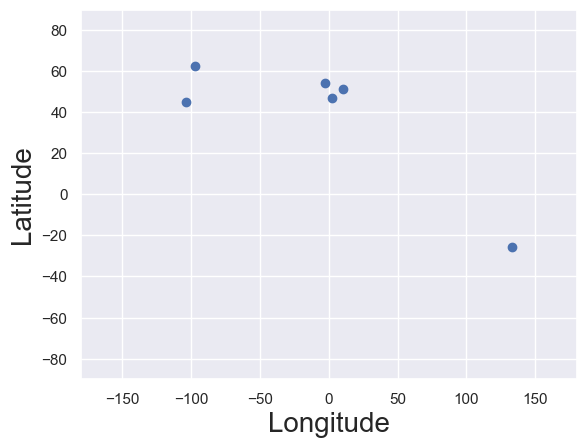

In [4]:
plt.scatter(raw_data['Longitude'],raw_data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.xlabel('Longitude',fontsize=20)
plt.ylabel('Latitude',fontsize=20)
plt.show()

In [20]:
data_mapped = raw_data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [27]:
x =data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [33]:
kmeans = KMeans(2)

In [34]:
kmeans.fit(x)

KMeans(n_clusters=2)

In [35]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, 1, 1, 0])

In [36]:
data_with_clusters = raw_data.copy()
data_with_clusters['Clusters']=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


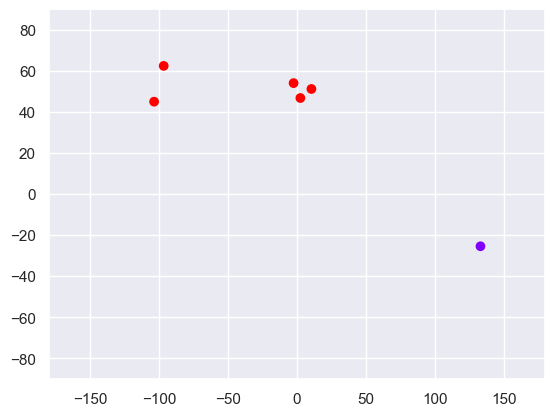

In [37]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [38]:
kmeans.inertia_

13208.958119999996

In [39]:
wcss=[]
for i in range(1,7):
    kmeans =KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [40]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

## The Elbow Method

Text(0, 0.5, 'Within cluster sum of squares')

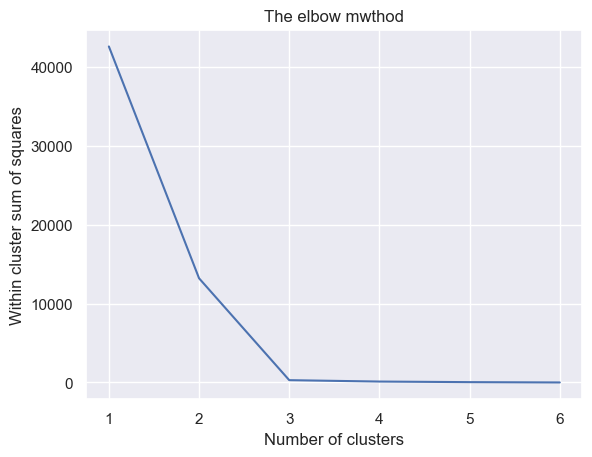

In [41]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The elbow mwthod')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')
